# 05: Model Selection

### Imported Libraries

In [1]:
import sys
print('Python version: %s' % (sys.version))
from collections import Counter
print('\tCounter imported.')

# data management
print('\nData Management Libraries')
import pandas as pd
print('\tpandas version: %s' % (pd.__version__))
import numpy as np
print('\tnumpy version: %s' % (np.__version__))
import regex as re
print('\tregex version: %s' % (re.__version__))

# visualizing
print('\nVisualization Libraries')
from matplotlib import pyplot as plt
import matplotlib
print('\tmatplotlib version: %s' % (matplotlib.__version__))
import seaborn as sns
print('\tseaborn version: %s' % (sns.__version__))


# modeling
print('\nModeling Libraries')
import imblearn
print('\timblearn version: %s' % imblearn.__version__)
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import sklearn
print('\tsklearn version: %s' % sklearn.__version__)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Python version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
	Counter imported.

Data Management Libraries
	pandas version: 1.1.3
	numpy version: 1.19.2
	regex version: 2.5.86

Visualization Libraries
	matplotlib version: 3.3.2
	seaborn version: 0.11.0

Modeling Libraries
	imblearn version: 0.7.0
	sklearn version: 0.23.2


### Update Library Settings

In [2]:
# set random state for reproducibility
random_state = 42

# default numpy settings
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 80

# update settings
np.set_printoptions(edgeitems=15, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

# update pandas settings
pd.set_option('max_colwidth', 200)
pd.options.display.max_rows = 250

### Import Dataframe

In [3]:
df = pd.read_csv('../data/creditcard_04.csv')

In [4]:
df.head()

,Amount_StandardScaled,TimeDayAware_StandardScaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-2.486373,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-2.486373,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-2.486326,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-2.486326,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-2.486278,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [5]:
df.describe()

,Amount_StandardScaled,TimeDayAware_StandardScaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.217782e-16,3.471925e-15,3.923752e-15,5.559442e-16,-8.769520e-15,2.759583e-15,-1.549320e-15,2.005281e-15,-1.695447e-15,-1.933764e-16,...,5.192147e-16,1.539134e-16,7.961936e-16,5.400022e-16,4.459446e-15,1.446667e-15,1.705510e-15,-3.661977e-16,-1.204021e-16,0.001727
std,1.000002e+00,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-3.532294e-01,-2.486373e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-3.308401e-01,-6.738023e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,-2.652715e-01,8.087540e-02,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,-4.471707e-02,8.195194e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,1.023622e+02,1.618165e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


### Split Dataset into Train, Test

In [6]:
preserve_original_frame = df.copy() # preserve original frame

In [7]:
X = df.drop('Class', axis=1)     # get independent features
y = df['Class']                  # get dependent feature (class)

# Review Models
 scoring parameter full list: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

### Assign feature sets

In [8]:
def resample_frame(df, n=len(df), random_state=random_state):
    df = df.sample(n=n, random_state=random_state).reset_index(drop=True)
    return df

df = resample_frame(df) # resampled

In [9]:
def assign_features(df, n_samples=len(df)):
    while True:
        _df = df.copy()
        _df = resample_frame(_df)[:n_samples]
        
        if len(_df.Class[_df.Class == 1]) > 0:
            break
        print('Sampled again due to no dependent variables!')
        
    X = _df.drop('Class', axis=1)    # drop the output series from the dataset to isolate inputs (independent features)
    y = _df['Class']    # set y to the output series (dependent feature)
    
    return X,y

X,y = assign_features(df,1000) # assign features for 1000 samples
print('Number of dependent variables: %i (%g%%)' % (len(y[y==1]), len(y[y==1])/len(y)))

Number of dependent variables: 3 (0.003%)


In [10]:
master_n_samples = int(len(df)*0.10) # using only 10% of the sample size
run_these = ['RFC','LSVC','LOGR','KNN'] # leave out MNB (not relevant) SGDC (redundancy with LSVC) 

In [11]:
def plot_multi(X, y, scoring_param, n_samples=1000, run_these=[], test_size=0.3, random_state=42, max_Rfc_depth=25, CV=5):
        
#    X = df.drop('Class', axis=1)     # drop the output series from the dataset to isolate inputs (independent features)
#    y = df['Class']     # set y to the output series (dependent feature)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import SGDClassifier
    from sklearn.svm import LinearSVC
    from sklearn.neighbors import KNeighborsClassifier

    name_dict = {
        'RandomForestClassifier':'RFC',
        'LinearSVC': 'LSVC',
        'MultinomialNB':'MNB',
        'LogisticRegression':'LOGR',
        'SGDClassifier':'SGDC',
        'KNeighborsClassifier':'KNN',
    }
    models = [
        LogisticRegression(random_state=random_state),
        SGDClassifier(),
        LinearSVC(),
        RandomForestClassifier(max_depth=max_Rfc_depth, random_state=random_state),
        MultinomialNB(),
        KNeighborsClassifier(),
    ]
    
    # create dataframe, list for data catch
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []

    from sklearn.model_selection import cross_val_score # loop models, return accuracy
    for model in models:
        model_name = name_dict[model.__class__.__name__]
        if model_name in run_these:
            scores = cross_val_score(model, X_train, y_train, scoring=scoring_param, cv=CV, n_jobs=-1)
            for fold_idx, score in enumerate(scores):
                entries.append((model_name, fold_idx, score))
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', scoring_param])
        sns.boxplot(x='model_name', y=scoring_param, data=cv_df)
        sns.stripplot(x='model_name', y=scoring_param, data=cv_df, 
                      size=8, jitter=True, edgecolor="gray", linewidth=2)
        plt.title('n_samples: {}'.format(n_samples))
        plt.grid(axis='y', which='both')
        plt.xlabel('Classifiers')

### Evaluate accuracy across models

<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is

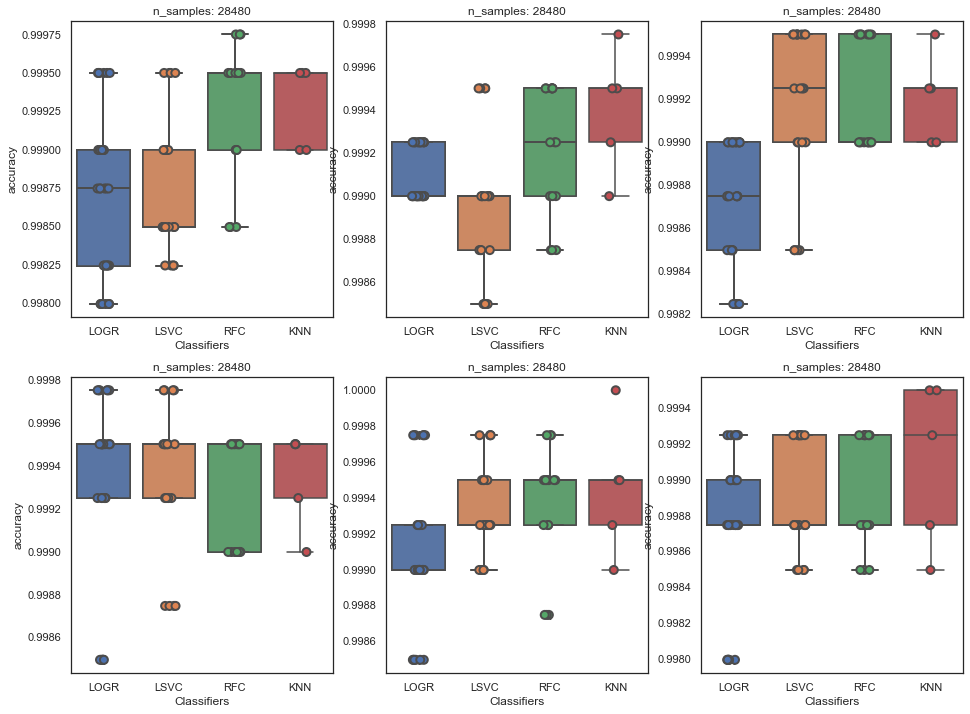

Wall time: 1min 3s


In [12]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
iter_ct = 6
iter_this = np.linspace(1,iter_ct,iter_ct)

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(16,12), facecolor='w', edgecolor='k')
for i in iter_this:
    df = resample_frame(df) # resample frame
    X,y = assign_features(df,master_n_samples) # reassign features
    plt.subplot(2, 3, i)
    plot_multi(X, y, scoring_param='accuracy', n_samples=master_n_samples, run_these=run_these)

plt.show()

### Resample Training set with Smote

In [13]:
X = preserve_original_frame.drop('Class', axis=1)     # get independent features
y = preserve_original_frame['Class']                  # get dependent feature (class)

sm = SMOTE(random_state=random_state)
X_sm,y_sm = sm.fit_sample(X,y)
print('Before fit: %s' % Counter(y))
print('After fit: %s' % Counter(y_sm))

smote_df = X_sm.copy()
smote_df['Class'] = y_sm.copy()

Before fit: Counter({0: 284315, 1: 492})
After fit: Counter({0: 284315, 1: 284315})


In [14]:
df = smote_df.copy() # use synthetic sample for model review input frame

In [15]:
master_n_samples = int(len(df)*0.10) # using only 10% of the sample size
run_these = ['RFC','LSVC','LOGR','KNN'] # leave out MNB (not relevant) SGDC (redundancy with LSVC) 

<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is

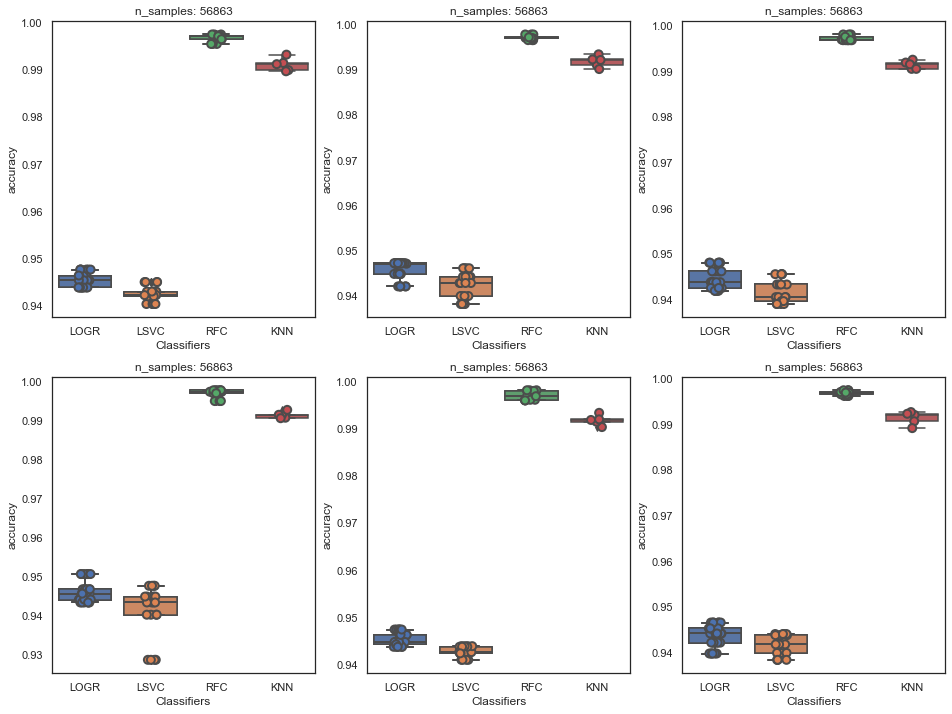

Wall time: 2min 35s


In [16]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
iter_ct = 6
iter_this = np.linspace(1,iter_ct,iter_ct)

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(16,12), facecolor='w', edgecolor='k')
for i in iter_this:
    df = resample_frame(df) # resample frame
    X,y = assign_features(df,master_n_samples) # reassign features
    plt.subplot(2, 3, i)
    plot_multi(X, y, scoring_param='accuracy', n_samples=master_n_samples, run_these=run_these)

plt.show()

In [17]:
df = smote_df.copy() # use synthetic sample for model review input frame
master_n_samples = int(len(df)*0.10) # using only 10% of the sample size
run_these = ['LOGR','RFC'] # leave out MNB (not relevant) SGDC (redundancy with LSVC) 

<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is

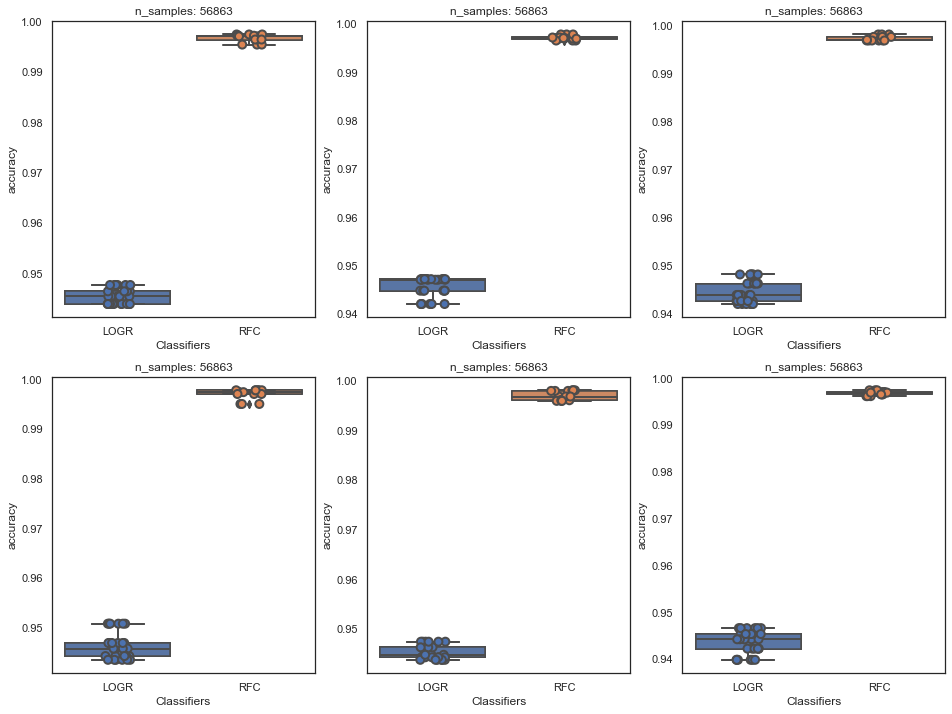

Wall time: 1min 24s


In [18]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
iter_ct = 6
iter_this = np.linspace(1,iter_ct,iter_ct)

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(16,12), facecolor='w', edgecolor='k')
for i in iter_this:
    df = resample_frame(df) # resample frame
    X,y = assign_features(df,master_n_samples) # reassign features
    plt.subplot(2, 3, i)
    plot_multi(X, y, scoring_param='accuracy', n_samples=master_n_samples, run_these=run_these)

plt.show()

In [19]:
df = smote_df.copy() # use synthetic sample for model review input frame
master_n_samples = int(len(df)*0.10) # using only 10% of the sample size
run_these = ['LOGR'] # leave out MNB (not relevant) SGDC (redundancy with LSVC) 

<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is

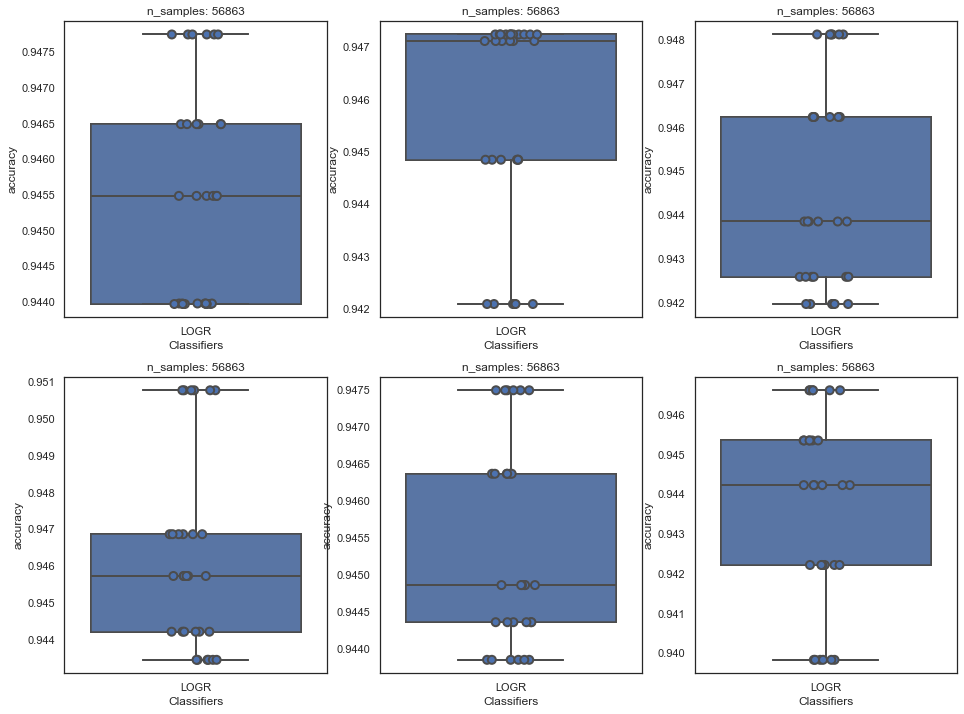

Wall time: 6.97 s


In [20]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
iter_ct = 6
iter_this = np.linspace(1,iter_ct,iter_ct)

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(16,12), facecolor='w', edgecolor='k')
for i in iter_this:
    df = resample_frame(df) # resample frame
    X,y = assign_features(df,master_n_samples) # reassign features
    plt.subplot(2, 3, i)
    plot_multi(X, y, scoring_param='accuracy', n_samples=master_n_samples, run_these=run_these)

plt.show()